# Curve Fitting in Python

### Introduction

Python is a power tool for fitting data to any functional form.  You are no longer limited to the simple linear or polynominal functions you could fit in Excel.  You can also calculate the standard error for any parameter in a functional fit.

The basic steps to fitting data are:
1.  Import the `curve_fit` function from scipy.
2.  Create a list or numpy array of your independent variable (your x values).  You might read this data in from another source, like a CSV file.
3.  Create a list of numpy array of your depedent variables (your y values).  You might read this data in from another source, like a CSV file.
4.  Create a function for the equation you want to fit.  The function should accept as inputs the dependent variable and all the parameters to be fit.
5.  Use the function `curve_fit` to fit your data.
6.  Extract the fit parameters from the output of `curve_fit`.
7.  Call you function to calculate y values using your fit model to see how well your model fits the data.
8.  Graph your original data and the fit equation.

Remember that as you go through the tutorial, you will need to run each cell.

### Example 1

First, let's import the relevant libraries we will need.  As usual, we will import `matplotlib.pyplot` and `numpy`.  We will also import the new `curve_fit` function from `scipy`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Now consider the following data.  Let's make a graph to look at it.

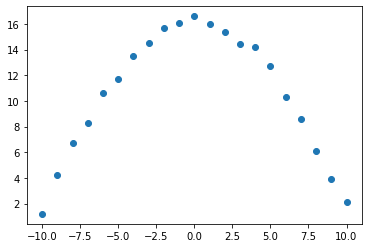

In [3]:
#Specify xdata and ydata as lists
xdata = [ -10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
ydata = [1.2, 4.2, 6.7, 8.3, 10.6, 11.7, 13.5, 14.5, 15.7, 16.1, 16.6, 16.0, 15.4, 14.4, 14.2, 12.7, 10.3, 8.6, 6.1, 3.9, 2.1]

#Make xdata and ydata into numpy arrays so we can use their handy features
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
plt.plot(xdata, ydata, 'o')

This data could probably be fit to many functional forms.  We will try two different functional forms.  (Looking at data and knowing what function it might fit to is extremely difficult and beyond the scope of what we will discuss here.  For purposes of our class, you will always know what functional form you should be fitting to.)
1.  Gaussian Function: $ y = A e^{-Bx^2} $
2.  Cosine Function: $ D cos (E x) $

In [4]:
# Code input for the Gaussian function fit

# Define the Gaussian function
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

#Save the output of curve_fit as params
parameters, covariance = curve_fit(Gauss, xdata, ydata)

<ipython-input-4-a6c52dd59ef4>:5: RuntimeWarning: overflow encountered in exp
  y = A*np.exp(-1*B*x**2)


The output of `curve_fit` is two things.  The first, which we have called parameteres, is an array of the optimal values of the parameters.  The second, which we have called covariance, is the estimated covariance of the parameters.  We will extract the optimized fit parameters.

In [5]:
# Seperate the parameters
fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)

16.934286340519687
0.015739600927241554


Now we want to see how well our model fits our data.  To do this, we will calculate values of y, using our function and the fit values of A and B, and then we will make a plot to compare the fit values to our data.

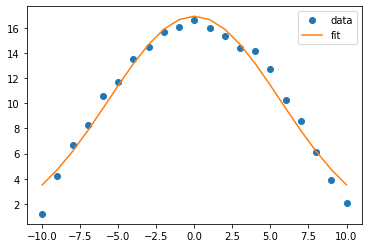

In [6]:
fit_y = Gauss(xdata, fit_A, fit_B)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()


To calculate the standard error of the parameters from the covariance, you take the square root of the diagonal elements of the matrix.  You can do this in one line using functions from `numpy`.

In [7]:
SE = np.sqrt(np.diag(covariance))
print(SE)

[0.35658082 0.0008652 ]


In [8]:
SE_A = SE[0]
SE_B = SE[1]

print(F'The value of A is {fit_A:.5f} with standard error of {SE_A:.5f}.')
print(F'The value of B is {fit_B:.5f} with standard error of {SE_B:.5f}.')

The value of A is 16.93429 with standard error of 0.35658.
The value of B is 0.01574 with standard error of 0.00087.


### Example 2

The cosine function proves to be a bit trickier.  If we approach the problem as we do above, we see from the graph that we don't get a good fit.

In [9]:
def cos_func(x, D, E):
    y = D*np.cos(E*x)
    return y

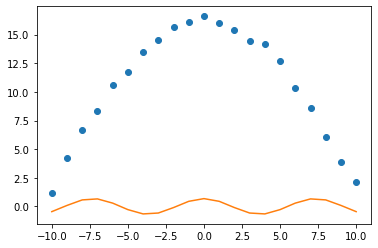

In [10]:
parameters, covariance = curve_fit(cos_func, xdata, ydata)
fit_D = parameters[0]
fit_E = parameters[1]

fit_cosine = cos_func(xdata, fit_D, fit_E)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_cosine, '-', label='fit')

To fix this, we need to give a guess for what we think our parameters are.  Thinking about the form of the cosine function, the height of the function is controlled by the D parameter.  Looking at our graph, it seems the value of D is somewhere between 15 and 17.  Similarly, the E parameter tells us how many cycles occur over the 0 to 2$\pi$ interval.  This is a very wide graph; there is clearly much less than one cycle between 0 and 2$\pi$, so we will guess that E is between 0 and 1.  To incorporate these guesses into our code, we create two new arrays.  One array specifies the lower bound for each parameter; the other specifies the upper bound for each parameter.  We then specify these bounds when we call `curve_fit`.  

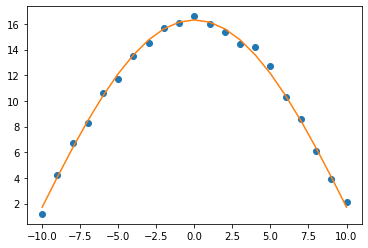

In [11]:
lower = [15, 0]
upper = [17, 1]
parameters, covariance = curve_fit(cos_func, xdata, ydata, bounds=(lower, upper) )
fit_D = parameters[0]
fit_E = parameters[1]

fit_cosine = cos_func(xdata, fit_D, fit_E)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_cosine, '-', label='fit')

Now that looks like a good fit!  

Frequently, you will have to adjust your guesses to get a good fit for your data.  If you understand the physical significance of your data and the equation you are trying to fit, you will have an easier time fitting your data.

### Exercise

Calculate the standard error for the D and E parameters.  Print each parameter and its standard error.

In [12]:
SE = np.sqrt(np.diag(covariance))
SE_D = SE[0]
SE_E = SE[1]

print(F'The values of D is {fit_D:.5f} and the standard error is {SE_D:.5f}.')
print(F'The value of E is {fit_E:.5f} and the standard error is {SE_E:.5f}.')

The values of D is 16.31473 and the standard error is 0.11091.
The value of E is 0.14649 and the standard error is 0.00090.
